# **_Introduction_**

Since Jan. 1, 2015, [The Washington Post](https://www.washingtonpost.com/) has been compiling a database of every fatal shooting in the US by a police officer in the line of duty. 

<center><img src=https://i.imgur.com/sX3K62b.png></center>

While there are many challenges regarding data collection and reporting, The Washington Post has been tracking more than a dozen details about each killing. This includes the race, age and gender of the deceased, whether the person was armed, and whether the victim was experiencing a mental-health crisis. The Washington Post has gathered this supplemental information from law enforcement websites, local new reports, social media, and by monitoring independent databases such as "Killed by police" and "Fatal Encounters". The Post has also conducted additional reporting in many cases.

There are 4 additional datasets: US census data on poverty rate, high school graduation rate, median household income, and racial demographics. [Source of census data](https://factfinder.census.gov/faces/nav/jsf/pages/community_facts.xhtml).

### Upgrade Plotly

Run the cell below if you are working with Google Colab

In [ ]:
# %pip install --upgrade plotly

## **_Import Statements_**

In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# This might be helpful:
from collections import Counter

## **_Notebook Presentation_**

In [ ]:
pd.options.display.float_format = '{:,.2f}'.format

## **_Load the Data_**

#### **_Make file retrieval process more robust w/`os` stuff:_**

In [ ]:
import os

In [ ]:
curr_dir = os.getcwd()
data_dir = os.path.join(curr_dir, 'data')

data_dir

In [ ]:
enc = 'windows-1252'

hh_income_csv_path = os.path.join(data_dir, "Median_Household_Income_2015.csv")
df_hh_income = pd.read_csv(hh_income_csv_path, encoding=enc)

pct_poverty_csv_path = os.path.join(data_dir, "Pct_People_Below_Poverty_Level.csv")
df_pct_poverty = pd.read_csv(pct_poverty_csv_path, encoding=enc)

pct_completed_hs_csv_path = os.path.join(data_dir, "Pct_Over_25_Completed_High_School.csv")
df_pct_completed_hs = pd.read_csv(pct_completed_hs_csv_path, encoding=enc)

share_race_city_csv_path = os.path.join(data_dir, "Share_of_Race_By_City.csv")
df_share_race_city = pd.read_csv(share_race_city_csv_path, encoding=enc)

fatalities_csv_path = os.path.join(data_dir, "Deaths_by_Police_US.csv")
df_fatalities = pd.read_csv(fatalities_csv_path, encoding=enc)


---
---

# **_Preliminary Data Exploration_**

* What is the shape of the DataFrames? 

In [ ]:
print(f"`df_hh_income` shape: {df_hh_income.shape}")
print(f"`df_pct_poverty` shape: {df_pct_poverty.shape}")
print(f"`df_pct_completed_hs` shape: {df_pct_completed_hs.shape}")
print(f"`df_share_race_city` shape: {df_share_race_city.shape}")
print(f"`df_fatalities` shape: {df_fatalities.shape}")

---

* How many rows and columns do they have?

In [ ]:
df_hh_income_columns, df_hh_income_rows = df_hh_income.shape
print(f"df_hh_income cols: {df_hh_income_columns}")
print(f"df_hh_income rows: {df_hh_income_rows}\n")

df_pct_poverty_columns, df_pct_poverty_rows = df_pct_poverty.shape
print(f"df_pct_poverty cols: {df_pct_poverty_columns}")
print(f"df_pct_poverty rows: {df_pct_poverty_rows}\n")

df_pct_completed_hs_columns, df_pct_completed_hs_rows = df_pct_completed_hs.shape
print(f"df_pct_completed_hs cols: {df_pct_completed_hs_columns}")
print(f"df_pct_completed_hs rows: {df_pct_completed_hs_rows}\n")

df_share_race_city_columns, df_share_race_city_rows = df_share_race_city.shape
print(f"df_share_race_city cols: {df_share_race_city_columns}")
print(f"df_share_race_city rows: {df_share_race_city_rows}\n")

df_fatalities_columns, df_fatalities_rows = df_fatalities.shape
print(f"df_fatalities cols: {df_fatalities_columns}")
print(f"df_fatalities rows: {df_fatalities_rows}\n")


#### **_Analysis:_**

The first four DFs have similar number of rows.

The second and third DFs have the exact same number of rows.

The first three have the same number of columns.

The last has many fewer rows, but more columns.

---

* What are the column names?

In [ ]:
def format_col_names(dataframe):
    col_list = dataframe.columns
    col_name_str = ", ".join(col_list)
    return col_name_str

In [ ]:
df_hh_income_cols = format_col_names(df_hh_income)
print(f"`df_hh_income` col names: {df_hh_income_cols}\n")

df_pct_poverty_cols = format_col_names(df_pct_poverty)
print(f"`df_pct_poverty` col names: {df_pct_poverty_cols}\n")

df_pct_completed_hs_cols = format_col_names(df_pct_completed_hs)
print(f"`df_pct_completed_hs` col names: {df_pct_completed_hs_cols}\n")

df_share_race_city_cols = format_col_names(df_share_race_city)
print(f"`df_share_race_city` col names: {df_share_race_city_cols}\n")

df_fatalities_cols = format_col_names(df_fatalities)
print(f"`df_fatalities` col names: {df_fatalities_cols}\n")


---

* Are there any NaN values or duplicates?

In [ ]:
print(f"`NaN` info for `df_hh_income`: {df_hh_income.isna().sum()}\n")
print(f"Duplicate # for `df_hh_income`: {df_hh_income.duplicated().sum()}\n")

In [ ]:
print(f"`NaN` info for `df_pct_poverty`: {df_pct_poverty.isna().sum()}\n")
print(f"Duplicate # for `df_pct_poverty`: {df_pct_poverty.duplicated().sum()}\n")

In [ ]:
print(f"`NaN` info for `df_pct_completed_hs`: {df_pct_completed_hs.isna().sum()}\n")
print(f"Duplicate # for `df_pct_completed_hs`: {df_pct_completed_hs.duplicated().sum()}\n")

In [ ]:
print(f"`NaN` info for `df_share_race_city`: {df_share_race_city.isna().sum()}\n")
print(f"Duplicate # for `df_share_race_city`: {df_share_race_city.duplicated().sum()}\n")

In [ ]:
print(f"`NaN` info for `df_fatalities`: {df_fatalities.isna().sum()}\n")
print(f"Duplicate # for `df_fatalities`: {df_fatalities.duplicated().sum()}\n")

#### **_Analysis:_**

df_hh_income and df_fatalities have NaN issues.

None of the DFs have duplicates.

---

## **_Data Cleaning - Check for Missing Values and Duplicates_**

Consider how to deal with the NaN values. Perhaps substituting 0 is appropriate. 

In [ ]:
# Before fixing NaNs:
df_hh_income.isna().sum()

In [ ]:
df_hh_income['Median Income'] = df_hh_income['Median Income'].fillna(0)

In [ ]:
# After fixing NaNs:
df_hh_income.isna().sum()

---

In [ ]:
# Before fixing NaNs:
df_fatalities.isna().sum()

In [ ]:
df_fatalities['armed'] = df_fatalities['armed'].fillna(0)
df_fatalities['age'] = df_fatalities['age'].fillna(0)
df_fatalities['race'] = df_fatalities['race'].fillna(0)
df_fatalities['flee'] = df_fatalities['flee'].fillna(0)

In [ ]:
# After fixing NaNs:
df_fatalities.isna().sum()

#### **_Analysis:_**

All `NaN`s handled.

No duplicates to be handled.

---
---

# **_Chart the Poverty Rate in each US State_**

Create a bar chart that ranks the poverty rate from highest to lowest by US state. Which state has the highest poverty rate? Which state has the lowest poverty rate?  Bar Plot

In [ ]:
# df_hh_income
# df_pct_poverty
# df_pct_completed_hs
# df_share_race_city
# df_fatalities

##### **_Check data types for column `poverty_rate`:_**

In [ ]:
df_pct_poverty.dtypes

##### **_Check all strings are numbers:_**

In [ ]:
# for i in df_pct_poverty.poverty_rate:
#     print(i)

##### **_Some values are `-`, let's replace them with `0`:_**

In [ ]:
df_pct_poverty["poverty_rate"] = df_pct_poverty["poverty_rate"].replace("-", "0")

##### **_Convert that column from str/object to numeric/int:_**

In [ ]:
df_pct_poverty["poverty_rate"] = pd.to_numeric(df_pct_poverty["poverty_rate"])

##### **_Remove rows w/0 (no data):_**

In [ ]:
df_pct_poverty = df_pct_poverty[df_pct_poverty["poverty_rate"] != 0]

##### **_Two ways to aggregate data:_**

In [ ]:
df_pov_state = df_pct_poverty.groupby("Geographic Area")["poverty_rate"].mean().reset_index()

# Or:
# df_pov_state = df_pct_poverty.groupby("Geographic Area").agg({"poverty_rate": 'mean'}).reset_index()

##### **_Sort and reset indices:_**

In [ ]:
df_pov_state.sort_values(by="poverty_rate", inplace=True, ascending=False)
df_pov_state.reset_index(inplace=True, drop=True)

##### **_Verify the new DF:_**

In [ ]:
# df_pov_state

##### **_Colors I like for a white background:_**

In [ ]:
seaborn_palettes = ['deep', 'muted', 'pastel', 'bright', 'dark', 'colorblind']

In [ ]:
from matplotlib import colormaps
all_palettes = list(colormaps) + seaborn_palettes

In [ ]:
pov_states = df_pov_state["Geographic Area"]
pov_rate = df_pov_state["poverty_rate"]

In [ ]:
from random import choice, choices

##### **_w/Seaborn:_**

In [ ]:
# Initialize MatPlotLib figure
fig, ax = plt.subplots(figsize=(17, 7))

palette = choice(seaborn_palettes)

# Plot the months/counts:
# sns.barplot(x=pov_states, y=pov_rate, hue=pov_states, palette=palette, legend='auto')
sns.barplot(
    df_pov_state,
    x="Geographic Area",
    y="poverty_rate",
    hue="Geographic Area",
    palette=palette,
)

plt.xlabel("States", size=14, weight='bold')
plt.ylabel("Poverty Rate (pct.)", size=14, weight='bold')

plt.title(f"Poverty Rates: US States\n(color palette: {palette})",
          size=20,
          weight='bold')

plt.show()

In [ ]:
colors = ["blue",
          "navy",
          "peru",
          "black",
          "brown",
          "green",
          "olive",
          "indigo",
          "maroon",
          "purple",
          "sienna",
          "crimson",
          "darkred",
          "dimgray",
          "darkblue",
          "darkcyan",
          "deeppink",
          "seagreen",
          "chocolate",
          "darkgreen",
          "darkkhaki",
          "firebrick",
          "goldenrod",
          "limegreen",
          "olivedrab",
          "palegreen",
          "rosybrown",
          "royalblue",
          "slateblue",
          "steelblue",
          "darkorange",
          "darkorchid",
          "darksalmon",
          "darkviolet",
          "dodgerblue",
          "lightgreen",
          "mediumblue",
          "sandybrown",
          "darkmagenta",
          "forestgreen",
          "greenyellow",
          "saddlebrown",
          "springgreen",
          "yellowgreen",
          "darkseagreen",
          "midnightblue",
          "darkgoldenrod",
          "darkslateblue",
          "darkslategray",
          "darkslategrey",
          "darkturquoise",
          "rebeccapurple",
          "cornflowerblue",
          "darkolivegreen",
          "mediumseagreen",
          "mediumslateblue",
          "mediumspringgreen"]

In [ ]:
bar_colors = choices(colors, k=len(df_pov_state))

In [ ]:
# Create labels for legend:
state_rate = zip(pov_states, pov_rate)
labels_state_rate = [f"{state}: {round(rate, 2)}%" for state, rate in state_rate]

##### **_w/Matplotlib and descriptive legend:_**

In [ ]:
fig, ax = plt.subplots(figsize=(17, 11))

ax.bar(x=pov_states,
       height=pov_rate,
       label=labels_state_rate,
       color=bar_colors,
       width=0.5)

ax.set_title("Poverty Rates: US States", fontsize=36, weight='bold')
ax.set_xlabel("States", fontsize=18)
ax.set_ylabel("Poverty Rate Percentage", fontsize=18)

plt.legend(ncol=2,
           title="State: Poverty Rate",
           fontsize='medium',
           bbox_to_anchor=(1.05, 1))

plt.xticks(rotation=90)

plt.show()

#### **_Analysis:_**

In [ ]:
df_pov_state.describe()

Which state has the highest poverty rate? 

- Mississippi (MS): $26.88\%$

Which state has the lowest poverty rate?

- New Jersey (NJ): $8.16\%$

Middling:

- Indiana (IN): $15.5\%$

---

# **_Chart the High School Graduation Rate by US State_**

Show the High School Graduation Rate in ascending order of US States.

Which state has the lowest high school graduation rate?

Which state has the highest?

### **_Do the exact same as above:_**

#### **_Clean/aggregate new dataframe:_**

In [ ]:
df_pct_completed_hs.columns

In [ ]:
df_pct_completed_hs.dtypes

In [ ]:
for i in df_pct_completed_hs.percent_completed_hs:
    print(i)

In [ ]:
df_pct_completed_hs["percent_completed_hs"] = df_pct_completed_hs["percent_completed_hs"].replace("-", "0")

In [ ]:
df_pct_completed_hs["percent_completed_hs"] = pd.to_numeric(df_pct_completed_hs["percent_completed_hs"])

In [ ]:
df_pct_completed_hs = df_pct_completed_hs[df_pct_completed_hs["percent_completed_hs"] != 0]

In [ ]:
# df_pct_completed_hs

In [ ]:
df_hs_state = df_pct_completed_hs.groupby("Geographic Area")["percent_completed_hs"].mean().reset_index()

# Or:
# df_hs_state = df_pct_completed_hs.groupby("Geographic Area").agg({"percent_completed_hs": 'mean'}).reset_index()

In [ ]:
# df_hs_state
# df_pct_completed_hs
# percent_completed_hs


In [ ]:
df_hs_state.sort_values(by="percent_completed_hs", inplace=True, ascending=True)
df_hs_state.reset_index(inplace=True, drop=True)

In [ ]:
# df_hs_state

#### **_Plot:_**

In [ ]:
colors = ["black",
          "blue",
          "brown",
          "chocolate",
          "cornflowerblue",
          "crimson",
          "darkblue",
          "darkcyan",
          "darkgoldenrod",
          "darkgreen",
          "darkkhaki",
          "darkmagenta",
          "darkolivegreen",
          "darkorange",
          "darkorchid",
          "darkred",
          "darksalmon",
          "darkseagreen",
          "darkslateblue",
          "darkslategray",
          "darkslategrey",
          "darkturquoise",
          "darkviolet",
          "deeppink",
          "dimgray",
          "dodgerblue",
          "firebrick",
          "forestgreen",
          "goldenrod",
          "green",
          "greenyellow",
          "indigo",
          "lightgreen",
          "limegreen",
          "maroon",
          "mediumblue",
          "mediumseagreen",
          "mediumslateblue",
          "mediumspringgreen",
          "midnightblue",
          "navy",
          "olive",
          "olivedrab",
          "palegreen",
          "peru",
          "purple",
          "rebeccapurple",
          "rosybrown",
          "royalblue",
          "saddlebrown",
          "sandybrown",
          "seagreen",
          "sienna",
          "slateblue",
          "springgreen",
          "steelblue",
          "yellowgreen"]

In [ ]:
states = df_hs_state["Geographic Area"]

grad = df_hs_state["percent_completed_hs"]

# Create labels for legend:
state_grad = zip(states, grad)
labels_state_grad = [f"{state}: {round(grad, 2)}%" for state, grad in state_grad]

In [ ]:
fig, ax = plt.subplots(figsize=(17, 11))

bar_colors = choices(colors, k=len(df_hs_state))

ax.bar(x=states,
       height=grad,
       label=labels_state_grad,
       color=bar_colors,
       width=0.5)

ax.set_title("High School Graduation Rate:\nUS States", fontsize=36, weight='bold')
ax.set_xlabel("States", fontsize=18)
ax.set_ylabel("High School Graduation Rate", fontsize=18)

plt.legend(ncol=2,
           title="State: HS Grad Rate",
           fontsize='medium',
           bbox_to_anchor=(1.05, 1))

plt.xticks(rotation=90)

plt.show()

In [ ]:
df_pov_state.describe()

#### **_Analysis:_**

Which state has the lowest high school graduation rate?

- Texas (TX): $76.77\%$

Which state has the highest?

- Massachusetts (MA): $92.4\%$

Middle:

- Ohio (OH): $88.34\%$

---
---

# **_Visualise the Relationship between Poverty Rates and High School Graduation Rates_**

#### Create a line chart with two y-axes to show if the ratio of poverty and high school graduation move together.  

#### **_Create DF with poverty and high school data merged on State names:_**

In [ ]:
df_state_hs_poverty = df_hs_state.merge(df_pov_state, on='Geographic Area')

In [ ]:
df_state_hs_poverty

#### **_Inspect date:_**

In [ ]:
for i in range(len(df_state_hs_poverty)):
    state = df_state_hs_poverty['Geographic Area'][i]
    print(state)
    state_grad_rate = df_state_hs_poverty['percent_completed_hs'][i]
    print(state_grad_rate)
    state_pov_rate = df_state_hs_poverty['poverty_rate'][i]
    print(state_pov_rate)

#### **_Create column for state names for clarity on plot:_**

In [ ]:
state_dict = {"TX": "Texas", "MS": "Mississippi", "GA": "Georgia", "LA": "Louisiana", "AR": "Arkansas", "AL": "Alabama", "AZ": "Arizona", "SC": "South Carolina", "TN": "Tennessee", "NM": "New Mexico", "CA": "California", "KY": "Kentucky", "WV": "West Virginia", "OK": "Oklahoma", "NC": "North Carolina", "MO": "Missouri", "VA": "Virginia", "AK": "Alaska", "ID": "Idaho", "FL": "Florida", "IN": "Indiana", "SD": "South Dakota", "ND": "North Dakota", "OR": "Oregon", "WA": "Washington", "OH": "Ohio", "KS": "Kansas", "NV": "Nevada", "MD": "Maryland", "IL": "Illinois", "DE": "Delaware", "RI": "Rhode Island", "PA": "Pennsylvania", "MI": "Michigan", "DC": "District of Columbia", "MN": "Minnesota", "VT": "Vermont", "NE": "Nebraska", "CO": "Colorado", "IA": "Iowa", "WI": "Wisconsin", "MT": "Montana", "NY": "New York", "NH": "New Hampshire", "NJ": "New Jersey", "ME": "Maine", "CT": "Connecticut", "UT": "Utah", "HI": "Hawaii", "WY": "Wyoming", "MA": "Massachusetts"}

state_names= np.array([state_dict.get(i) for i in df_state_hs_poverty['Geographic Area']],
                      dtype='object')

df_state_hs_poverty['State_Names'] = state_names

#### **_Do the thing:_**

In [ ]:
# Create axes:
fig, ax1 = plt.subplots(figsize=(25, 11))
ax2 = ax1.twinx()

# Extract data from DataFrame, using state names instead of abbreviations:
states = df_state_hs_poverty['State_Names']
state_grad_rates = np.round(df_state_hs_poverty['percent_completed_hs'], 2)
state_pov_rates = np.round(df_state_hs_poverty['poverty_rate'], 2)

# Axes colors (find good complements):
ax1_color = 'steelblue'
ax2_color = 'firebrick'

# Plot left y-axis, Graduation Rate:
ax1.plot(states,
         state_grad_rates,
         label=f"{states}: {state_grad_rates}",
         linewidth=2,
         linestyle='-',
         marker='o',
         color=ax1_color)

# Plot right y-axis, Poverty Rate:         
ax2.plot(states,
         state_pov_rates,
         label=f"{states}: {state_pov_rates}",
         linewidth=2.5,
         linestyle=':',
         marker='o',
         color=ax2_color)

# Make a title:
title = "Dual Y-Axis Plot:\n"
title += "United States, by State ~2015:\n"
title += "High School Graduation Rate vs. Poverty Rate\n"
title += "(Source: U.S. Bureau of the Census)"
ax1.set_title(title, fontsize=24, weight='bold')


# Make x-axis label:
ax1.set_xlabel("United States: States", fontsize=20, weight='bold')

# Make y-axes labels:
ax1.set_ylabel("HS Graduation Percentage (age 25+)",
                fontsize=14,
                weight='bold')

ax2.set_ylabel("Poverty Rate Percentage",
               fontsize=14,
               weight='bold')

# Customize each axes grid for ease of plot visualization:
ax1.grid(color=ax1_color, linestyle='-', alpha=0.7)
ax1.yaxis.label.set_color(ax1_color)
ax1.tick_params(axis='y', colors=ax1_color)

ax2.grid(color=ax2_color, linestyle=':', alpha=0.7)
ax2.yaxis.label.set_color(ax2_color)
ax2.tick_params(axis='y', colors=ax2_color)

# Rotate x-axis tick labels:
ax1.set_xticks(states)
ax1.set_xticklabels(states, rotation=90)

# Show the thing:
plt.show()

#### **_Analysis:_**

There is a general trend when viewing the Graduation and Poverty data in this dual plot:

-   The upward graduation rate trend is in stark contrast to a trend of falling poverty rates.

-   My conclusion is that states with higher high school graduation rates tend to have lower poverty.

There are specific exceptions to this contrasting trend, but the general pattern is obvious.

<font size=1>

```python
scat_cat = px.scatter(data_frame=cat_merged_df,
                      x='App',
                      y='Installs',
                      title='Category Concentration',
                      size='App',
                      hover_name=cat_merged_df.index,
                      color='Installs')
scat_cat.update_layout(xaxis_title='Number of Apps (Lower=More Concentrated)',
                       yaxis_title='Installs',
                       yaxis=dict(type='log'))

scat_cat.show()

# My thought: shouldn't we be anaylyzing the ratio, not the raw data?

# Calculate the ratio of apps per category to installs
cat_merged_df['Ratio'] = cat_merged_df['App'] / cat_merged_df['Installs']

scat_cat = px.scatter(data_frame=cat_merged_df,
                      x='Ratio',
                      y='Installs',
                      title='Category Concentration',
                      size='App',
                      hover_name=cat_merged_df.index,
                      color='Installs')
scat_cat.update_layout(xaxis_title='Ratio of Apps to Installs (Higher=More Concentrated)',
                       yaxis_title='Installs',
                       yaxis=dict(type='log'))

scat_cat.show()
```

</font>

---

#### Now use a Seaborn .jointplot() with a Kernel Density Estimate (KDE) and/or scatter plot to visualise the same relationship

In [ ]:
df_state_hs_poverty

#### **_Seaborn `joinplot()`: `kind=scatter` and `hue` set:_**

In [ ]:
with sns.axes_style('darkgrid'):
    grad_pov = sns.jointplot(
        df_state_hs_poverty,
        x='percent_completed_hs',
        y='poverty_rate',
        height=7,
        kind='scatter',
        hue='percent_completed_hs',
        legend='brief'
    ) 

sup_title = "Joint SCATTER Plot:\nState by State Analysis of\n"
sup_title += "HIGH SCHOOL GRADUATION RATE (HUE variable)\nvs.\nPOVERTY RATE\n"
sup_title += "[U.S. Bureau of the Census ~2015]"

grad_pov.figure.suptitle(sup_title,
                         size=14,
                         weight='bold')
grad_pov.figure.tight_layout()
# grad_pov.figure.subplots_adjust(top=0.865)

grad_pov.ax_joint.set_xlabel('High School Graduation Rate',
                             size=12, 
                             weight='bold')
grad_pov.ax_joint.set_ylabel('Poverty Rate',
                             size=12, 
                             weight='bold')

plt.show()

#### **_Seaborn `joinplot()`: `kind=scatter` w/`kdeplot()` & `rugplot()`:_**

In [ ]:
with sns.axes_style('darkgrid'):
    grad_pov = sns.jointplot(
        df_state_hs_poverty,
        x='percent_completed_hs',
        y='poverty_rate',
        height=7,
        kind='scatter',
        color='darkcyan',
    ) 

grad_pov.plot_joint(sns.kdeplot, color="darkorange", zorder=0, levels=6)
grad_pov.plot_marginals(sns.rugplot, color="darkorange", height=-.15, clip_on=False)

sup_title = "Joint SCATTER Plot w/KDE and RUGPLOTS:\n"
sup_title += "State by State Analysis of\n"
sup_title += "HIGH SCHOOL GRADUATION RATE\nvs.\nPOVERTY RATE\n"
sup_title += "[U.S. Bureau of the Census ~2015]"

grad_pov.figure.suptitle(sup_title,
                         size=14,
                         weight='bold')
grad_pov.figure.tight_layout()

grad_pov.ax_joint.set_xlabel('High School Graduation Rate',
                             size=12, 
                             weight='bold')
grad_pov.ax_joint.set_ylabel('Poverty Rate',
                             size=12, 
                             weight='bold')

plt.show()

#### **_Seaborn `joinplot()`: `kind=kde` w/`rugplot()`:_**

In [ ]:
with sns.axes_style('darkgrid'):
    grad_pov = sns.jointplot(
        df_state_hs_poverty,
        x='percent_completed_hs',
        y='poverty_rate',
        height=7,
        kind='kde',
        color='cadetblue',
    ) 

grad_pov.plot_marginals(sns.rugplot, color="darkorange", height=-.15, clip_on=False)

sup_title = "Joint KDE Plot w/RUGPLOT:\n"
sup_title += "State by State Analysis of\n"
sup_title += "HIGH SCHOOL GRADUATION RATE\nvs.\nPOVERTY RATE\n"
sup_title += "[U.S. Bureau of the Census ~2015]"

grad_pov.figure.suptitle(sup_title,
                         size=14,
                         weight='bold')
grad_pov.figure.tight_layout()

grad_pov.ax_joint.set_xlabel('High School Graduation Rate',
                             size=12, 
                             weight='bold')
grad_pov.ax_joint.set_ylabel('Poverty Rate',
                             size=12, 
                             weight='bold')

plt.show()

#### **_Analysis:_**

The heaviest clustering is around states with high graduation rates and low poverty rates.

This means there are more states with this combination of positive attributes, and that there are fewer states that have a combination of the more upsetting high poverty and low graduation rates. I would guess, and we'll see upon further analysis, that the instance of more violence upon civilians by police may be more concentrated in these states that have lower grad rates and high poverty rates...we'll see...

---

#### Seaborn's `.lmplot()` or `.regplot()` to show a linear regression between the poverty ratio and the high school graduation ratio. 

In [ ]:
plt.figure(figsize=(11, 7), dpi=200)

with sns.axes_style('darkgrid'):
    sns.regplot(data=df_state_hs_poverty,
                x='percent_completed_hs',
                y='poverty_rate',
                lowess=True,
                scatter_kws={'color': 'steelblue', 'alpha': 0.65},
                line_kws={'color': 'tomato', 'alpha': 0.85})

title = "Seaborn REGPLOT: Locally Weight Linear Regression\n"
title += "Distribution:\nPOVERTY RATE on HS GRADUATION RATE\n"
title += "United States: State by State\n(via Census ~2015)"
plt.title(title, size=16, weight='bold')

plt.xlabel("HS Graduation Rate", size=12, weight='bold')
plt.ylabel("Poverty Rate", size=12, weight='bold')

plt.show()

In [ ]:
from random import choices

seaborn_markers = ['o', '^', 'v', '<', '>', 's', 'D', 'd', 'p', 'h', 'H', '8',
                   'X', '*', '.', 'P', 'x', '+', '1', '2', '3', '4', '|', '_']

plot_markers = choices(seaborn_markers, 
                       k=len(df_state_hs_poverty['State_Names']))                   

In [ ]:
with sns.axes_style('darkgrid'):
    ax = sns.lmplot(data=df_state_hs_poverty,
                    x='percent_completed_hs',
                    y='poverty_rate',
                    hue='State_Names',
                    height=10,
                    legend=True,
                    aspect=1.25,
                    markers=plot_markers,
                    fit_reg=True,
                    scatter_kws={'alpha': 0.95},
                    facet_kws={'legend_out': True})

sns.move_legend(ax,
                1, 
                title='States (US)',
                title_fontsize=14,
                bbox_to_anchor=(.89, .99), 
                ncols=3, 
                frameon=True,
                fancybox=True,
                framealpha=.35)               

title = "Seaborn LMPLOT: SCATTER w/State Names Legend\n"
title += "Distribution:\nPOVERTY RATE on HS GRADUATION RATE\n"
title += "United States: State by State\n(via Census ~2015)"

plt.title(title, size=16, weight='bold')

plt.xlabel("HS Graduation Rate", size=12, weight='bold')
plt.ylabel("Poverty Rate", size=12, weight='bold')

plt.show()

In [ ]:
with sns.axes_style('darkgrid'):
    sns.lmplot(
        data=df_state_hs_poverty,
        x='percent_completed_hs',
        y='poverty_rate',
        height=6,
        lowess=True,
        aspect=1.5,
        scatter_kws={'alpha': 0.75, 'color': 'darkorange'},
        line_kws={'alpha': .8, 'linewidth': 3, 'color': 'teal'},
    )

title = "Seaborn LMPLOT: Locally Weight Linear Regression\n"
title += "Distribution:\nPOVERTY RATE on HS GRADUATION RATE\n"
title += "United States: State by State\n(via Census ~2015)"
plt.title(title, size=16, weight='bold')

plt.xlabel("HS Graduation Rate", size=12, weight='bold')
plt.ylabel("Poverty Rate", size=12, weight='bold')

plt.show()

In [ ]:
with sns.axes_style('darkgrid'):
    sns.lmplot(
        data=df_state_hs_poverty,
        x='percent_completed_hs',
        y='poverty_rate',
        height=6,
        logx=True,
        aspect=1.5,
        fit_reg=True,
        scatter_kws={'alpha': 0.75, 'color': 'teal'},
        line_kws={'alpha': .65, 'linewidth': 3, 'color': 'darkorange'},
    )

title = "Seaborn LMPLOT: $y \\sim log(x)$\n"
title += "Distribution:\nPOVERTY RATE on HS GRADUATION RATE\n"
title += "United States: State by State\n(via Census ~2015)"
plt.title(title, size=16, weight='bold')

plt.xlabel("HS Graduation Rate", size=12, weight='bold')
plt.ylabel("Poverty Rate", size=12, weight='bold')    

plt.show()

#### **_Analysis:_**

Based on the fact that all lot of the points in the scatterplots are close to the linear regression line plot, it appears there is a relationship between poverty level and high school graduation level.

---
---

# **_Create a Bar Chart..._**

### **_...with Subsections Showing the Racial Makeup of Each US State_**

Visualise the share of the white, black, hispanic, asian and native american population in each US State using a bar chart with sub sections. 

---

#### **_Inspect and transform `df_share_race_city`:_**

In [ ]:
# Create copy of original DF in case we make a mistake:
df_race_city = df_share_race_city.copy()

In [ ]:
print(df_race_city.columns)
print(df_race_city.dtypes)

In [ ]:
df_race_city

In [ ]:
race_cols = ['share_white', 
             'share_black', 
             'share_native_american', 
             'share_asian', 
             'share_hispanic']

# Inspect all columns to see if data has non-digit strings:
for col in race_cols:
    for i in df_race_city[col]:
        if not i.isdigit():
            print(col)
            break

In [ ]:
# Entries w/non-digit strings are meant to be '0', let's replace them:
for col in race_cols:
    df_race_city[col] = df_race_city[col].replace(r'[^\d\.]', '0', regex=True)

In [ ]:
# Convert data to numeric values:
for col in race_cols:
    df_race_city[col] = pd.to_numeric(df_race_city[col]) 

In [ ]:
# Inspect the cleaned, transformed DF:
print(df_race_city.dtypes)
print(df_race_city.shape)
df_race_city.describe()

In [ ]:
# Drop City column so next cell will work:
df_race_city = df_race_city.drop(columns=['City'])

In [ ]:
df_race_state = df_race_city.groupby('Geographic area').mean().reset_index()

In [ ]:
# Inspect new DF:
display(df_race_state)
print(df_race_state.dtypes)
print(df_race_state.shape)
df_race_state.describe()

In [ ]:
# Rename 'Geographic area' to 'state_abbr':
df_race_state.rename({'Geographic area': 'state_abbr'}, axis=1, inplace=True)

In [ ]:
# Add a column with state names:
state_dict = {"TX": "Texas", "MS": "Mississippi", "GA": "Georgia", "LA": "Louisiana", "AR": "Arkansas", "AL": "Alabama", "AZ": "Arizona", "SC": "South Carolina", "TN": "Tennessee", "NM": "New Mexico", "CA": "California", "KY": "Kentucky", "WV": "West Virginia", "OK": "Oklahoma", "NC": "North Carolina", "MO": "Missouri", "VA": "Virginia", "AK": "Alaska", "ID": "Idaho", "FL": "Florida", "IN": "Indiana", "SD": "South Dakota", "ND": "North Dakota", "OR": "Oregon", "WA": "Washington", "OH": "Ohio", "KS": "Kansas", "NV": "Nevada", "MD": "Maryland", "IL": "Illinois", "DE": "Delaware", "RI": "Rhode Island", "PA": "Pennsylvania", "MI": "Michigan", "DC": "District of Columbia", "MN": "Minnesota", "VT": "Vermont", "NE": "Nebraska", "CO": "Colorado", "IA": "Iowa", "WI": "Wisconsin", "MT": "Montana", "NY": "New York", "NH": "New Hampshire", "NJ": "New Jersey", "ME": "Maine", "CT": "Connecticut", "UT": "Utah", "HI": "Hawaii", "WY": "Wyoming", "MA": "Massachusetts"}

state_names= np.array([state_dict.get(i) for i in df_race_state['state_abbr']],
                      dtype='object')

df_race_state.insert(1, 'state_name', state_names)

In [ ]:
# Verify the rows each add up to about `100`:
df_race_state

#### **_The new df `df_race_state` is good to go!_**

---

#### **_Now the plot:_**

Visualise the share of the white, black, hispanic, asian and native american population in each US State using a bar chart with sub sections. 

In [ ]:
ax = df_race_state.plot(figsize=(29, 14), 
                        stacked=True, 
                        width=0.75,
                        kind='bar',
                        legend=True,
                        xticks=df_race_state.index)

ax.set_xticklabels(df_race_state['state_name'])                        


title = "Racial Population Analysis: United States\n"
title += "Multicolored Bars Represent\n100% of Each State's Population\n"
title += "[~2015 US Census]"
 
plt.title(title, size=36, weight='bold')
ax.tick_params(axis='x', which='major', labelsize=16)

plt.legend(fontsize=20)

plt.show()

#### **_Analysis:_**

**_First of all..._**

...the bars are not all equal to 100 -- which probably means:

- Taking the average of each column's values throws off the aggregate to 100 -- since we're taking the average along Axis 0 for an aggregate to 100 which would be along Axis 1

    - I think the general result should still be representative of the shares represented by each column, but upon a refactor will find a way to even out this phenomenon.

Since all the bars are hovering around 100, though, I feel satisfied that the data and this plot are showing a good representation of the share of data for each state.

I'll ignore this issue, since it seems negligible/a matter for future fine-tuning, and likely doesn't affect the accuracy of the overall accuracy of the racial breakdown for each state.

**_And B..._**

We can sort the plots by which percentage of each state is highest for each race for futher analysis, but for now we can clearly which states have the highest population of each race:

-   African American: Washington DC

-   Caucasian: Maine/New Hampshire/West Virginia

-   Asian: Hawaii

-   Latino: New Mexico or Texas

-   Native American: Alaska

---
---

# **_Create Donut Chart..._**

### **_...of People Killed by Race_**

Hint: Use `.value_counts()`

#### **_Data Cleaning and Transformation:_**

In [ ]:
race_counts = df_fatalities['race'].value_counts()

# Inspect:
# df_fatalities['race'].value_counts().nlargest(10)
# df_fatalities['race'].value_counts().nlargest(10).index

In [ ]:
race_counts

In [ ]:
# Replace `0` with `O` (undetermined):
df_fatalities['race'] = df_fatalities['race'].replace(0, 'O')

In [ ]:
race_counts = df_fatalities['race'].value_counts()

In [ ]:
# Now we have one metric for undetermined:
race_counts

In [ ]:
# Though, for clarity, let's rename to words rather than abbreviations:
race_dict = {'W': 'Caucasian', 'B': 'African American', 'H': 'Latino', 
             'A': 'Asian American', 'N': 'Native American', 'O': 'Undetermined'}

df_fatalities['race'] = df_fatalities['race'].replace(race_dict)

In [ ]:
# Drop the `id` column (we're not working w/relational databases): 
df_fatalities.drop(columns=['id'], inplace=True)

In [ ]:
# Now create `race_counts` again:
race_counts = df_fatalities['race'].value_counts()

In [ ]:
# This is much clearer than before:
print(race_counts)
print(race_counts.index)
print(race_counts.values)

---

#### **_Create Donut Chart of People Killed by Race:_**

_Hint: Use `.value_counts()`_

In [ ]:
from random import choices

colors = ['sienna', 'steelblue', 'olivedrab', 
          'darkslategrey', 'firebrick', 'rebeccapurple']

title = "People Killed by Police in the US by Race, 2015-2017"

fig = px.pie(
    labels=race_counts.index,
    values=race_counts.values,
    title=title,
    names=race_counts.index,
    hole=0.25,
    width=1280,
    height=1280,
    color_discrete_sequence=colors
)

fig.update_traces(
    textposition='inside',
    textfont=dict(family='tahoma', size=16, color='gainsboro'),
    textinfo='percent',
)

fig.update_layout(
    title=dict(font=dict(size=36)),
)

fig.show()

---

#### **_Analysis:_**

In order from highest percentage to lowest:

-   Caucasian: $47.4\%$

-   African American: $24.4\%$

-   Latino: $16.7\%$

-   Undetermined: $8.8\%$

-   Asian American: $1.54\%$

-   Native American: $1.22\%$

---
---

# **_Create a Chart Comparing the Total Number of Deaths of Men and Women_**

Use `df_fatalities` to illustrate how many more men are killed compared to women. 

In [ ]:
df_fatalities.sample()

In [ ]:
gender_counts = df_fatalities['gender'].value_counts()

In [ ]:
# Replace abbreviations with full words:
gender_dict = {'M': 'Male', 'F': 'Female'}

df_fatalities['gender'] = df_fatalities['gender'].replace(gender_dict)

In [ ]:
gender_counts = df_fatalities['gender'].value_counts()

In [ ]:
gender_counts

In [ ]:
from random import choices

colors = ['steelblue', 'firebrick']

title = "People Killed by Police in the US by Gender, 2015-2017"

fig = px.pie(
    labels=gender_counts.index,
    values=gender_counts.values,
    title=title,
    names=gender_counts.index,
    hole=0.25,
    width=840,
    height=840,
    color_discrete_sequence=colors
)

fig.update_traces(
    textposition='inside',
    textfont=dict(family='tahoma', size=12, color='gainsboro'),
    textinfo='percent',
)

fig.update_layout(
    title=dict(font=dict(size=24)),
)

fig.show()

#### **_Analysis:_**

Men killed by police: $95.8\%$

Women killed by police: $4.22\%$

---
---

# **_Create a Box Plot Showing the Age and Manner of Death_**

Break out the data by gender using `df_fatalities`. Is there a difference between men and women in the manner of death? 

In [ ]:
df_fatalities.dtypes

In [ ]:
# Inspect for non-numeric values:
for i in df_fatalities['age'].value_counts().index:
    print(i)

# All good    

In [150]:
# Inspect:
df_fatalities['manner_of_death'].value_counts()

manner_of_death
shot                2363
shot and Tasered     172
Name: count, dtype: int64

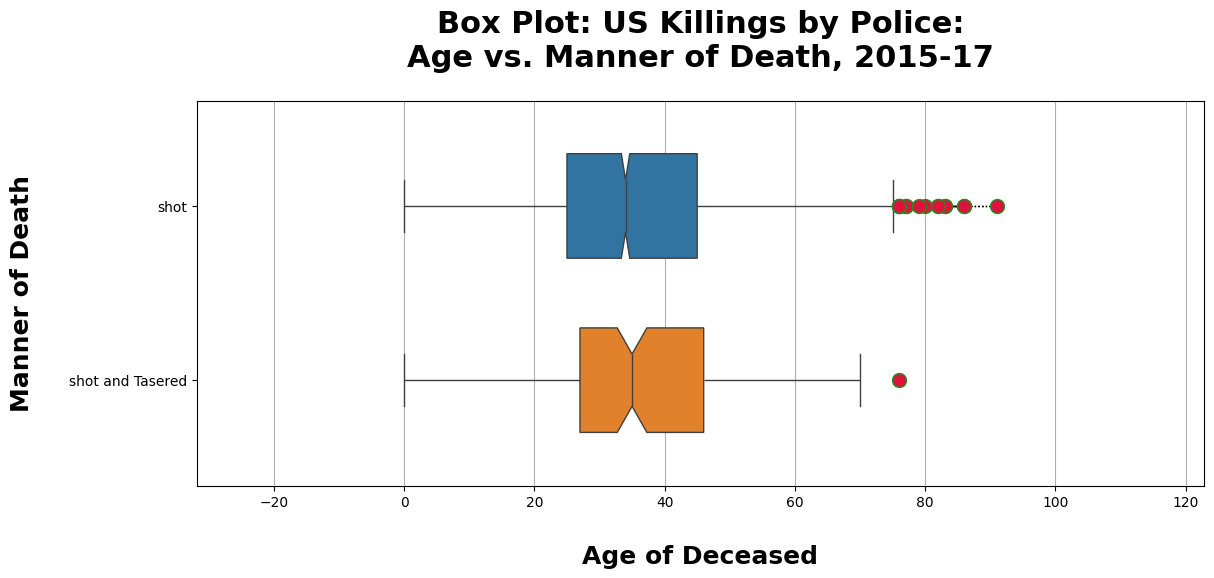

In [178]:
plt.figure(figsize=(13, 5))

sns.boxplot(
    data=df_fatalities,
    x='age',
    y='manner_of_death',
    width=0.6,
    notch=True,
    flierprops={"marker": "o",
                "markersize": 10,
                'markerfacecolor': 'crimson',
                'markeredgecolor': 'forestgreen',
                'linestyle': 'dotted'},
    hue='manner_of_death'
)

plt.title('Box Plot: US Killings by Police:\nAge vs. Manner of Death, 2015-17',
          fontdict={'size': 22, 'weight': 'bold'},
          pad=25.0)
          
plt.xlabel('Age of Deceased', 
           fontdict={'size': 18, 'weight': 'bold'}, 
           labelpad=25.0)
plt.ylabel('Manner of Death', 
           fontdict={'size': 18, 'weight': 'bold'}, 
           labelpad=25.0)

plt.grid(axis='x')
plt.margins(0.35)

plt.show()

#### **_Analysis:_**

Most victims were between the ages of 25 and 45, with the age range slightly higher for `shot and Tasered`.

More outliers of higher age (above 75) for `shot`.

---
---
---
---
---

---
---

# **_Were People Armed?_**

In what percentage of police killings were people armed? Create chart that show what kind of weapon (if any) the deceased was carrying. How many of the people killed by police were armed with guns versus unarmed? 

#### **_Analysis:_**

---
---

# **_How Old Were the People Killed?_**

Work out what percentage of people killed were under 25 years old.  

Create a histogram and KDE plot that shows the distribution of ages of the people killed by police. 

Create a seperate KDE plot for each race. Is there a difference between the distributions? 

#### **_Analysis:_**

---
---

# **_Race of People Killed_**

Create a chart that shows the total number of people killed by race. 

#### **_Analysis:_**

---
---

# **_Mental Illness and Police Killings_**

What percentage of people killed by police have been diagnosed with a mental illness?

#### **_Analysis:_**

---

# **_In Which Cities Do the Most Police Killings Take Place?_**

Create a chart ranking the top 10 cities with the most police killings. Which cities are the most dangerous?  

#### **_Analysis:_**

---

# **_Rate of Death by Race_**

Find the share of each race in the top 10 cities. Contrast this with the top 10 cities of police killings to work out the rate at which people are killed by race for each city. 

#### **_Analysis:_**

---

# **_Create a Choropleth Map of Police Killings by US State_**

Which states are the most dangerous? Compare your map with your previous chart. Are these the same states with high degrees of poverty? 

#### **_Analysis:_**

---

# **_Number of Police Killings Over Time_**

Analyse the Number of Police Killings over Time. Is there a trend in the data? 

#### **_Analysis:_**

---

# **_Epilogue_**

Now that you have analysed the data yourself, read [The Washington Post's analysis here](https://www.washingtonpost.com/graphics/investigations/police-shootings-database/).

In [ ]:
df_hh_income
df_fatalities

#### **_Analysis and Conclusion:_**

<font size=1>

```python
temporal_box = px.box(df_monthly,
                      x='pct_deaths',
                      y='temporality',
                      points='all',
                      color='temporality',
                      notched=True,
                      title='Proportion of Maternal Deaths Before and After Handwashing')

temporal_box.update_xaxes(tickangle=45)

temporal_box.update_layout(xaxis_title='Proportion of Maternal Deaths',
                           yaxis_title='Handwashing Temporality',
                           width=950,
                           height=525,
                           margin=dict(l=125, r=125, b=75, t=75, pad=5),
                           paper_bgcolor='LightSteelBlue')

temporal_box.show()
```

</font>

<font size=1>

```python
df_paid_apps = df_apps_clean[df_apps_clean['Type'] == 'Paid']

revenue_box = px.box(df_paid_apps,
                     x='Category',
                     y='Revenue_Estimate',
                     title='How Much Can Paid Apps Earn?',
                     log_y=True)

revenue_box.update_xaxes(tickangle=45)

revenue_box.update_layout(xaxis_title='Category',
                          yaxis_title='Paid App: Ballpark Estimate',
                          xaxis={'categoryorder': 'min ascending'},)

revenue_box.show()
```

</font>

In [ ]:
colors = [
    "black", "blue", "brown", "chocolate", "cornflowerblue", "crimson", "darkblue",
    "darkcyan", "darkgoldenrod", "darkgreen", "darkkhaki", "darkmagenta", "darkolivegreen",
    "darkorange", "darkorchid", "darkred", "darksalmon", "darkseagreen", "darkslateblue",
    "darkslategray", "darkslategrey", "darkturquoise", "darkviolet", "deeppink", "dimgray",
    "dodgerblue", "firebrick", "forestgreen", "goldenrod", "green", "greenyellow", "indigo",
    "lightgreen", "limegreen", "maroon", "mediumblue", "mediumseagreen", "mediumslateblue",
    "mediumspringgreen", "midnightblue", "navy", "olive", "olivedrab", "palegreen", "peru",
    "purple", "rebeccapurple", "rosybrown", "royalblue", "saddlebrown", "sandybrown",
    "seagreen", "sienna", "slateblue", "springgreen", "steelblue", "yellowgreen"
]

linestyles = ['-', ':', '-', ':']